Team Members: Erika Dickson, Drashti Mehta, Dulce Funez Chinchilla

4 or more performance metrics: Loss function, MSE, precision, recall
3 or more visualizing techniques for presenting the results: scatter plot, elbow plot, stacked bar plot with performance evaluation vals
Compare and analyze all the ML models that you have built for the project and present the performance analysis

(21000, 21)
       Gender      Male  Animal  Friends  Family  Dead&Imaginary  \
5048      1.0  0.000000     0.0     0.00    0.00             0.0   
7085      1.0  0.000000     0.0     0.00    0.00             0.0   
17910     1.0  0.000000     0.0     0.00    0.00             0.0   
6224      0.0  0.000000     0.0     0.00    0.00             0.0   
20394     0.0  0.000000     0.0     0.00    0.00             0.0   
...       ...       ...     ...      ...     ...             ...   
769       1.0  0.000000     0.0     0.50    0.50             0.0   
16023     0.0  0.000000     0.0     0.00    0.25             0.0   
16850     1.0  0.500000     0.0     0.25    0.25             0.0   
11284     1.0  0.333333     0.0     0.00    0.50             0.0   
5390      0.0  0.000000     0.0     0.20    0.00             0.0   

       Aggression/Friendliness  A/CIndex  F/CIndex  S/CIndex  
5048                  0.000000       0.0      0.00       0.0  
7085                  0.000000       0.0     

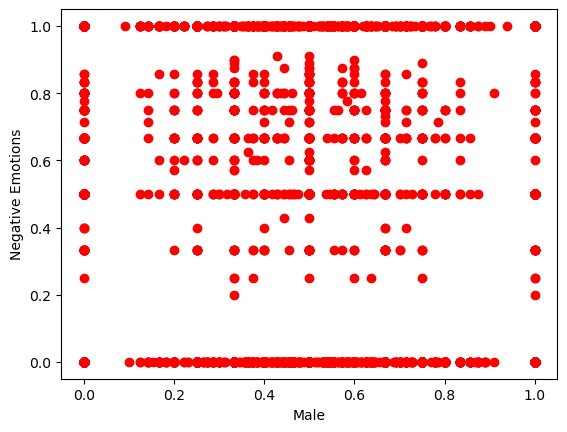

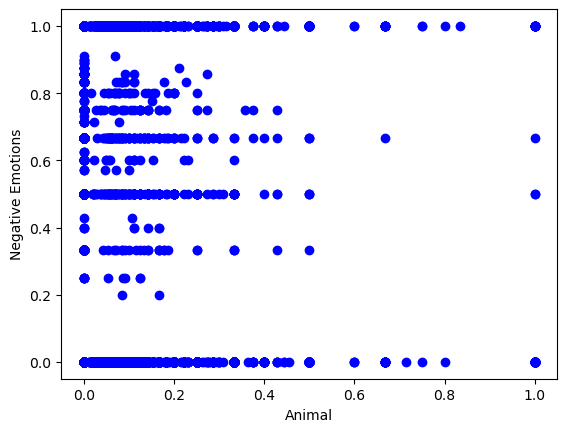

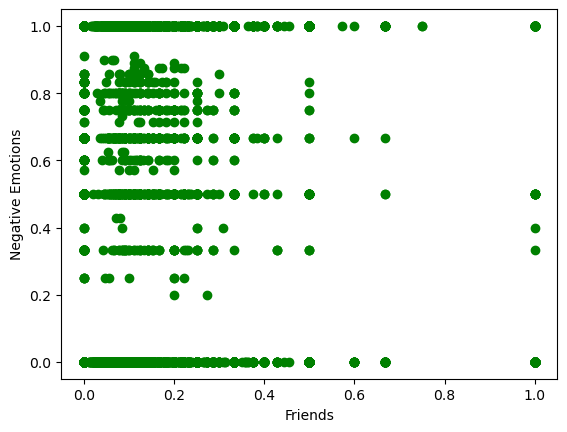

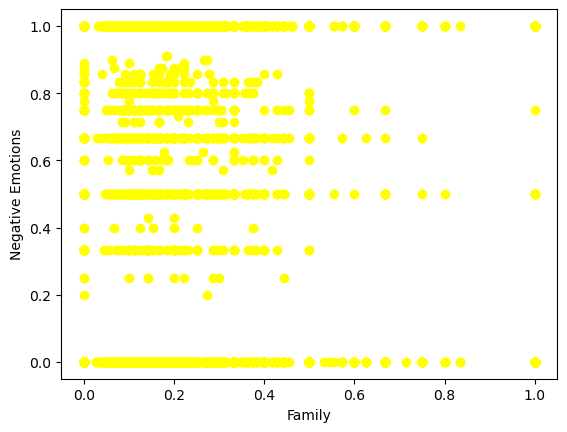

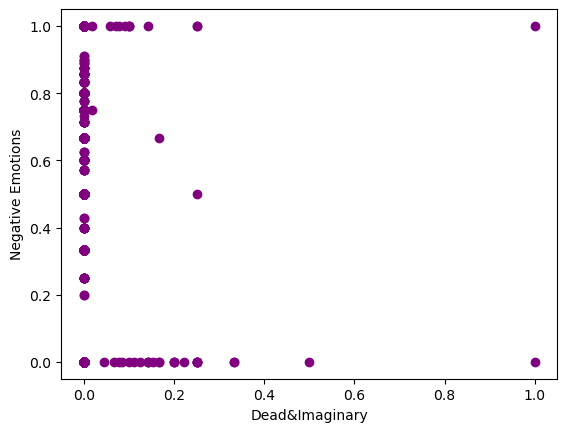

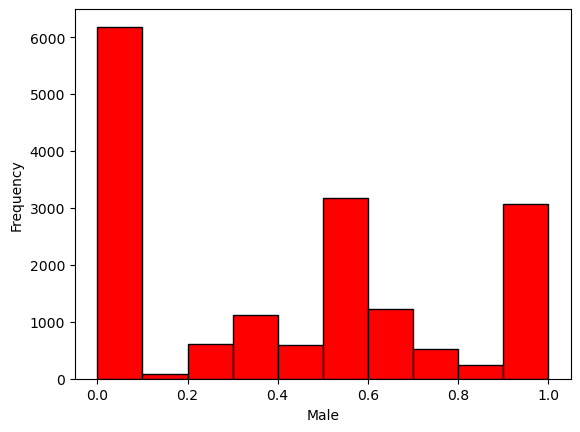

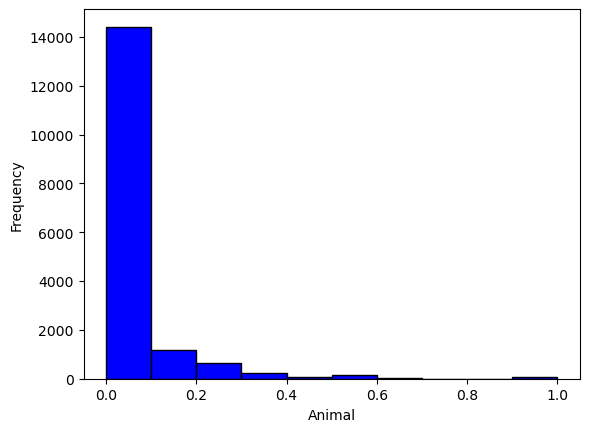

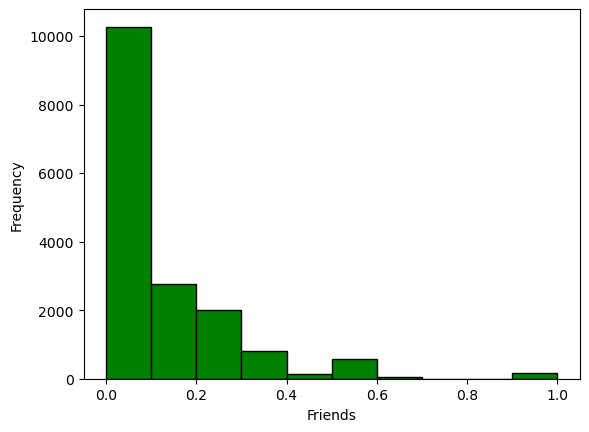

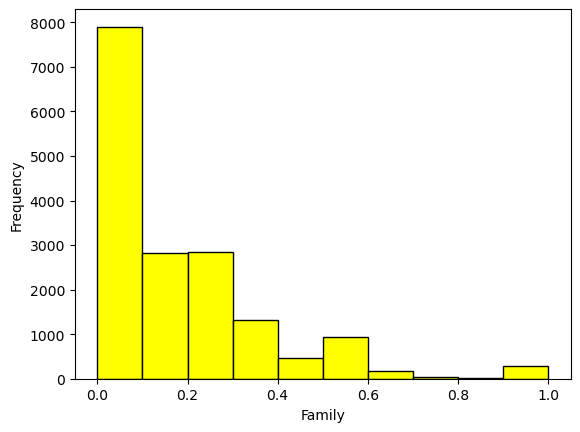

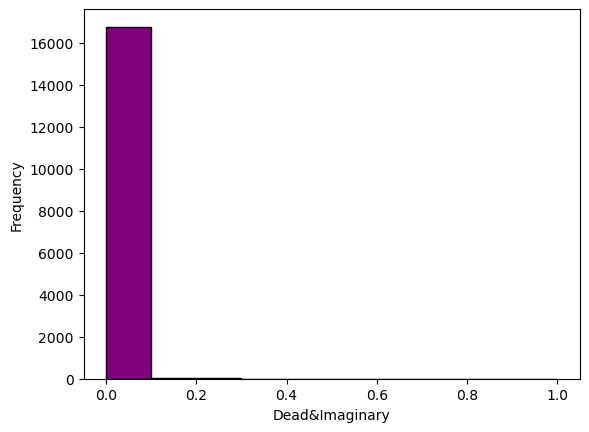

                           Gender      Male    Animal   Friends    Family  \
Gender                   1.000000 -0.022155 -0.017792 -0.105458  0.065204   
Male                    -0.022155  1.000000 -0.060983  0.231913  0.021379   
Animal                  -0.017792 -0.060983  1.000000 -0.013409 -0.019689   
Friends                 -0.105458  0.231913 -0.013409  1.000000 -0.128700   
Family                   0.065204  0.021379 -0.019689 -0.128700  1.000000   
Dead&Imaginary           0.006167 -0.015574 -0.005299 -0.011449 -0.008404   
Aggression/Friendliness -0.044520  0.024619  0.025333  0.001307 -0.022361   
A/CIndex                -0.027230 -0.052908  0.041126  0.039099 -0.008116   
F/CIndex                 0.096935 -0.012476 -0.036839  0.043381  0.025066   
S/CIndex                 0.015367  0.002929 -0.008512  0.045905 -0.001644   
NegativeEmotions         0.063773  0.017313 -0.004686  0.007380  0.025711   

                         Dead&Imaginary  Aggression/Friendliness  A/CIndex 

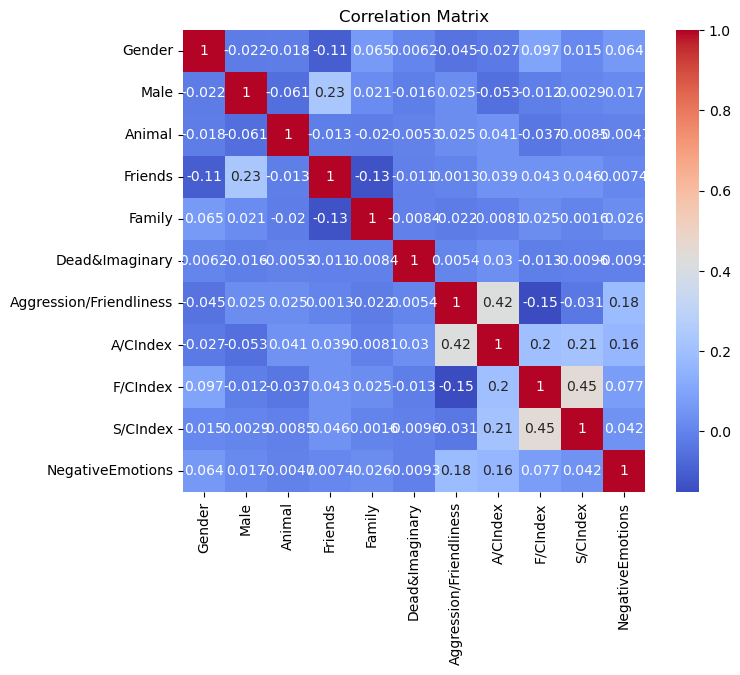

Index(['Gender', 'Male', 'Animal', 'Friends', 'Family', 'Dead&Imaginary',
       'Aggression/Friendliness', 'A/CIndex', 'F/CIndex', 'S/CIndex',
       'NegativeEmotions'],
      dtype='object')


,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417,0.0
8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889,1.0
9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000,1.0
17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000,0.0
16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857,1.0


[NbConvertApp] Converting notebook data_preprocessing.ipynb to script
[NbConvertApp] Writing 10131 bytes to data_preprocessing.py


In [2]:
import pandas as pd
import numpy as np
import pickle
import math
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from data_preprocessing import *
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import xgboost as xg 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor


In [27]:
dreams_proc = pd.read_csv('training_data.csv')
print(dreams_proc.shape)
dreams_proc.head(10)

(16800, 12)


,Unnamed: 0,Gender,Male,Animal,Friends,Family,Dead&Imaginary,Aggression/Friendliness,A/CIndex,F/CIndex,S/CIndex,NegativeEmotions
0,15345,1.0,0.500000,0.000000,0.166667,0.250000,0.0,0.833333,0.041667,0.007576,0.010417,0.0
1,8476,0.0,0.750000,0.055556,0.117647,0.176471,0.0,0.500000,0.022222,0.015152,0.013889,1.0
2,9052,1.0,0.000000,0.000000,0.250000,0.000000,0.0,0.500000,0.050000,0.045455,0.000000,1.0
3,17206,0.0,0.333333,0.000000,0.176471,0.235294,0.0,0.000000,0.000000,0.000000,0.000000,0.0
4,16188,1.0,0.250000,0.000000,0.142857,0.000000,0.0,1.000000,0.085714,0.012987,0.017857,1.0
5,4475,1.0,1.000000,0.000000,0.250000,0.000000,0.0,1.000000,0.150000,0.000000,0.000000,0.0
6,11744,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.100000,0.000000,0.250000,1.0
7,6056,1.0,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0
8,3755,1.0,0.000000,0.000000,0.000000,0.200000,0.0,0.142857,0.040000,0.127273,0.125000,0.0
9,15650,1.0,0.600000,0.166667,0.200000,0.300000,0.0,0.625000,0.066667,0.022727,0.000000,1.0


In [68]:
#Use scikit learn's KNN regression function
#KNN Regression on the processed dataset w/ k = 10
knn_regressor = KNeighborsRegressor(n_neighbors=10)
knn_regressor.fit(X_train_copy, y_train_copy)
y_predict_knn = knn_regressor.predict(X_test_copy)


filename = 'finalized_model_M1.model'
pickle.dump(knn_regressor, open(filename, 'wb'))

loaded_model = pickle.load(open(filename, 'rb'))
result_knn = loaded_model.score(X_test_copy, y_test_copy)
print("KNN Regressor R^2 Score:", result_knn)


KNN Regressor R^2 Score: -0.014712245376683253


In [70]:
#Mean Squared Error
mse_knn = mean_squared_error(y_test_copy, y_predict_knn)
print("Mean Squared Error:", mse_knn)

#Mean Absolute Error
mae_knn = mean_absolute_error(y_test_copy, y_predict_knn)
print(f'Mean Absolute Error (MAE): {mae_knn}')

#Root Mean Squared Error
rmse_knn = (mse_knn ** 0.5)
print(f'Root Mean Squared Error (RMSE): {rmse_knn}')

#R2 Function
r2_knn = r2_score(y_test_copy, y_predict_knn)
print(f"R-squared: {r2_knn}")


Mean Squared Error: 0.22821809168758733
Mean Absolute Error (MAE): 0.42499549743080955
Root Mean Squared Error (RMSE): 0.4777217722561819
R-squared: -0.014712245376683253


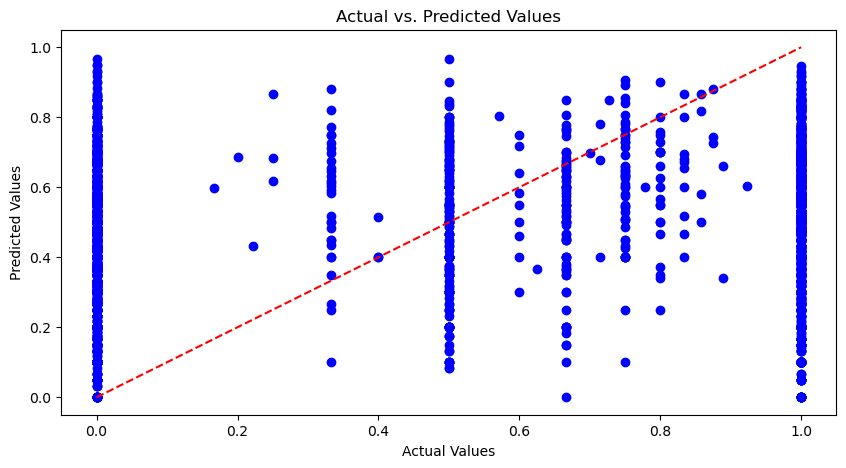

In [71]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_knn, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

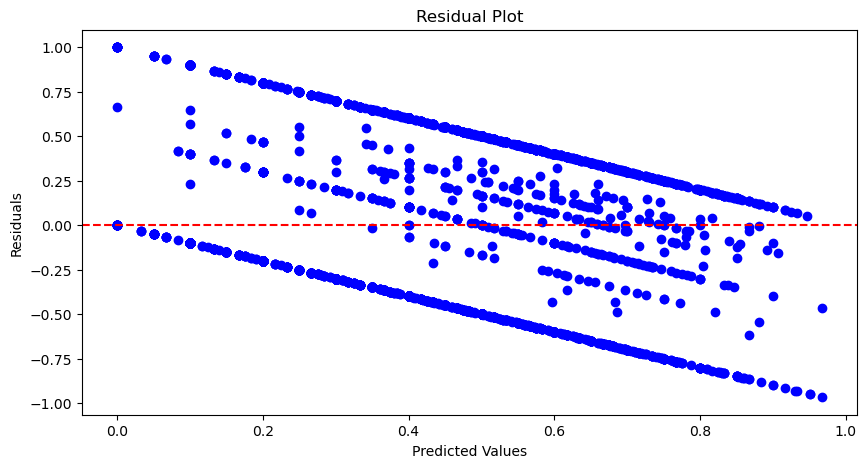

In [72]:
residuals_knn = np.array(y_test_copy) - np.array(y_predict_knn)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_knn, residuals_knn, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

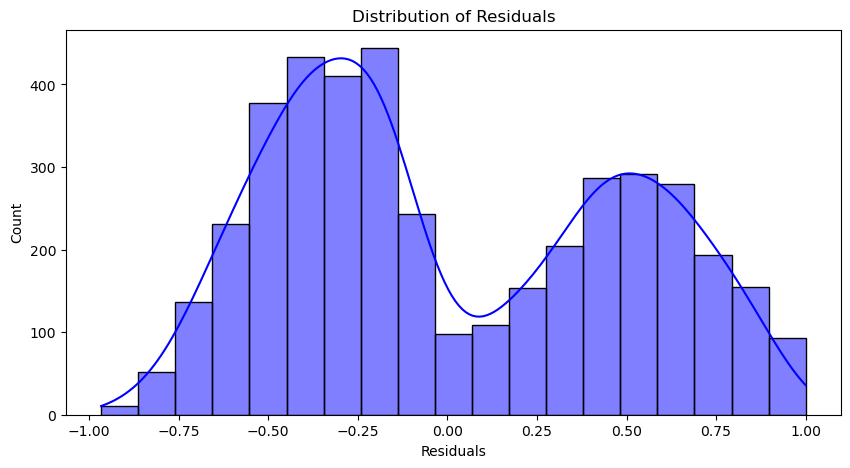

In [73]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals_knn, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [74]:
#Use scikit learn's linear regression function
#Linear regression on the processed dataset

linear_regression = LinearRegression() 
linear_regression.fit(X_train_copy, y_train_copy) 
y_predict_lr = linear_regression.predict(X_test_copy)

filename_lr = 'finalized_model_LR1.model'
pickle.dump(linear_regression, open(filename_lr, 'wb'))

loaded_model = pickle.load(open(filename_lr, 'rb'))
result_lr = loaded_model.score(X_test_copy, y_test_copy)
print("Linear Regression Score:", result_lr)

Linear Regression Score: 0.03417919614138065


In [75]:
#Mean Squared Error
mse_lr = mean_squared_error(y_test_copy, y_predict_lr)
print("Mean Squared Error:", mse_lr)

#Mean Absolute Error
mae_lr = mean_absolute_error(y_test_copy, y_predict_lr)
print(f'Mean Absolute Error (MAE): {mae_lr}')

#Root Mean Squared Error                                                                                                                                                                                             print(f'Mean Absolute Error (MAE): {mae}')
rmse_lr = (mse_lr ** 0.5)
print(f'Root Mean Squared Error (RMSE): {rmse_lr}')

#R2 Function
r2_lr = r2_score(y_test_copy, y_predict_lr)
print(f"R-squared: {r2_lr}")

Mean Squared Error: 0.21722195802117458
Mean Absolute Error (MAE): 0.4385584571635809
Root Mean Squared Error (RMSE): 0.4660707650359273
R-squared: 0.03417919614138065


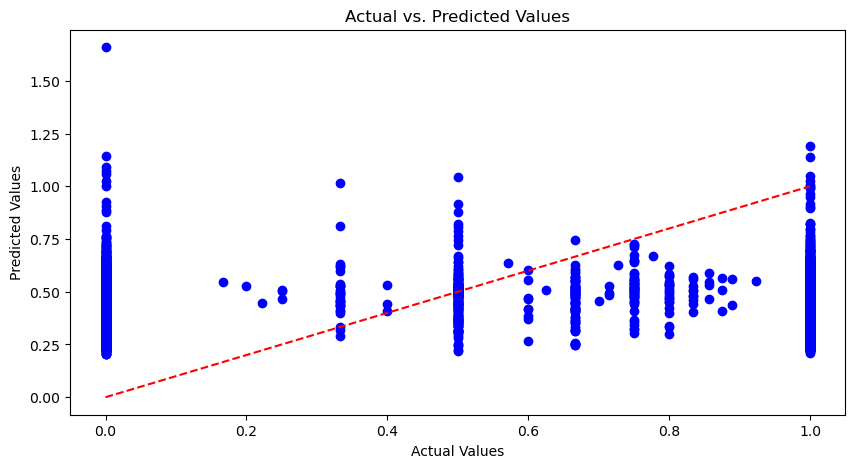

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_lr, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

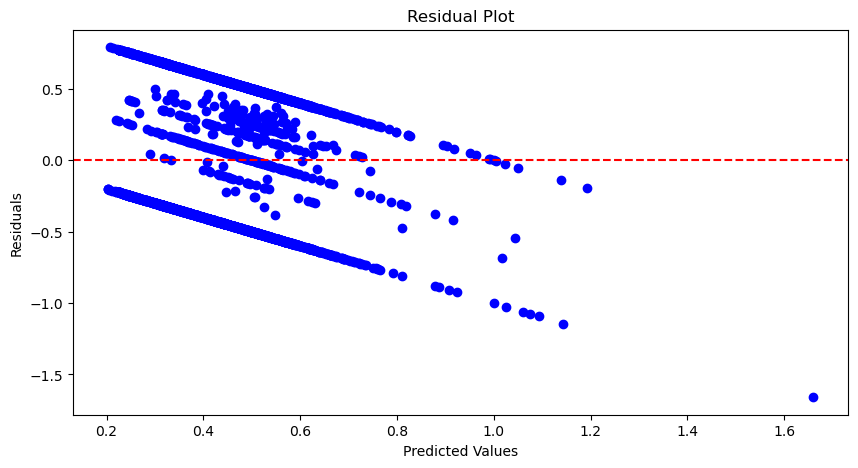

In [ ]:
residuals_lr = np.array(y_test_copy) - np.array(y_predict_lr)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_lr, residuals_lr, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

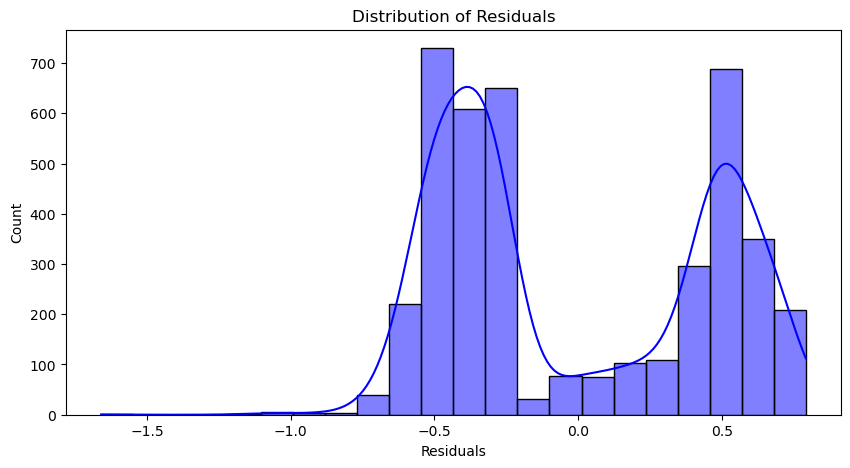

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals_lr, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
#Use scikit learn's SVM function
#SVM on the processed dataset
svm_regressor = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svm_regressor.fit(X_train_copy, y_train_copy)
y_predict_svm = svm_regressor.predict(X_test_copy)

filename_svm = 'finalized_model_SVM1.model'
pickle.dump(svm_regressor, open(filename_svm, 'wb'))

loaded_svm_model = pickle.load(open(filename_svm, 'rb'))
result_svm = loaded_svm_model.score(X_test_copy, y_test_copy)
print("SVM Score:", result_svm)

SVM Score: -0.10797930738563677


In [ ]:
#Mean Squared Error
mse_svm = mean_squared_error(y_test_copy, y_predict_svm)
print("Mean Squared Error:", mse_svm)

#Mean Absolute Error
mae_svm = mean_absolute_error(y_test_copy, y_predict_svm)
print(f'Mean Absolute Error (MAE): {mae_svm}')

#Root Mean Squared Error                                                                                                                                                                                             print(f'Mean Absolute Error (MAE): {mae}')
rmse_svm = (mse_svm ** 0.5)
print(f'Root Mean Squared Error (RMSE): {rmse_svm}')

#R2 Function
r2_svm = r2_score(y_test_copy, y_predict_svm)
print(f"R-squared: {r2_svm}")

Mean Squared Error: 0.2491947094489012
Mean Absolute Error (MAE): 0.39668461030488655
Root Mean Squared Error (RMSE): 0.4991940599094717
R-squared: -0.10797930738563677


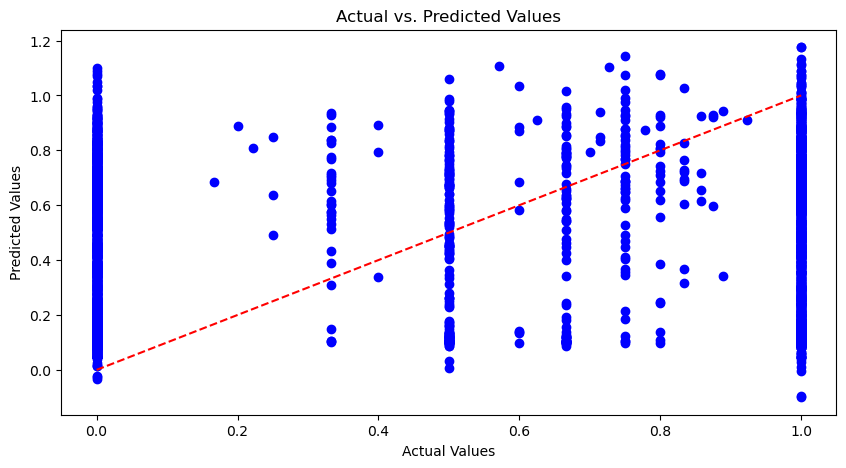

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_svm, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

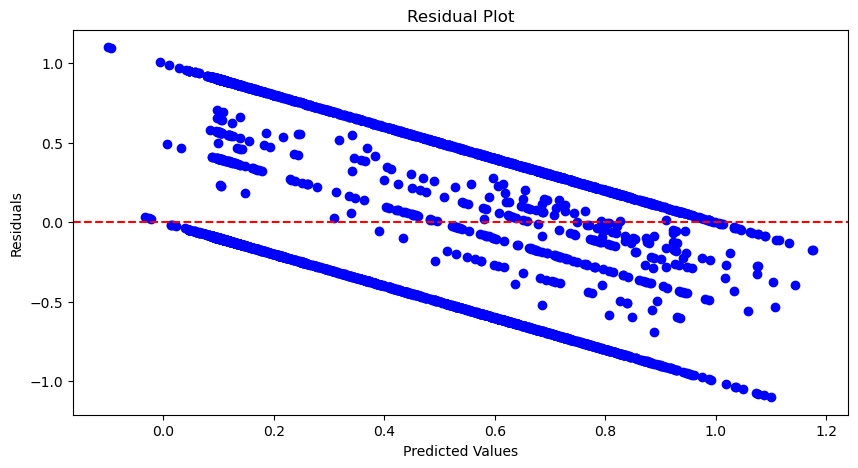

In [ ]:
residuals_svm = np.array(y_test_copy) - np.array(y_predict_svm)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_svm, residuals_svm, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

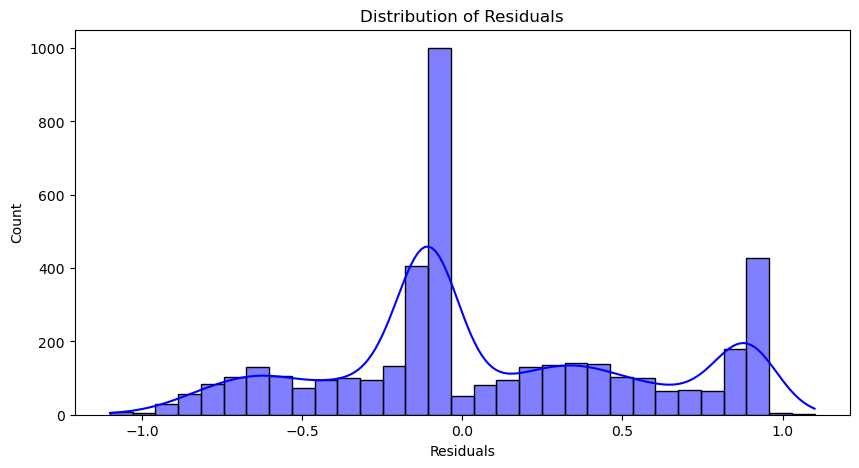

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals_svm, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
#Use scikit learn's random forest function
#Random forest on the processed dataset

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_copy, y_train_copy)
y_predict_rf = rf_regressor.predict(X_test_copy)

filename_rf = 'finalized_model_RF1.model'
pickle.dump(rf_regressor, open(filename_rf, 'wb'))

loaded_rf_model = pickle.load(open(filename_rf, 'rb'))
result_rf = loaded_rf_model.score(X_test_copy, y_test_copy)
print("Random Forest Score:", result_rf)

Random Forest Score: -0.007773943806621997


In [ ]:
#Mean Squared Error
mse_rf = mean_squared_error(y_test_copy, y_predict_rf)
print("Mean Squared Error:", mse_rf)

#Mean Absolute Error
mae_rf = mean_absolute_error(y_test_copy, y_predict_rf)
print(f'Mean Absolute Error (MAE): {mae_rf}')

#Root Mean Squared Error                                                                                                                                                                                             print(f'Mean Absolute Error (MAE): {mae}')
rmse_rf = (mse_rf ** 0.5)
print(f'Root Mean Squared Error (RMSE): {rmse_rf}')

#R2 Function
r2_rf = r2_score(y_test_copy, y_predict_rf)
print(f"R-squared: {r2_rf}")

Mean Squared Error: 0.2266576040211706
Mean Absolute Error (MAE): 0.4216853763728136
Root Mean Squared Error (RMSE): 0.47608571079288925
R-squared: -0.007773943806621997


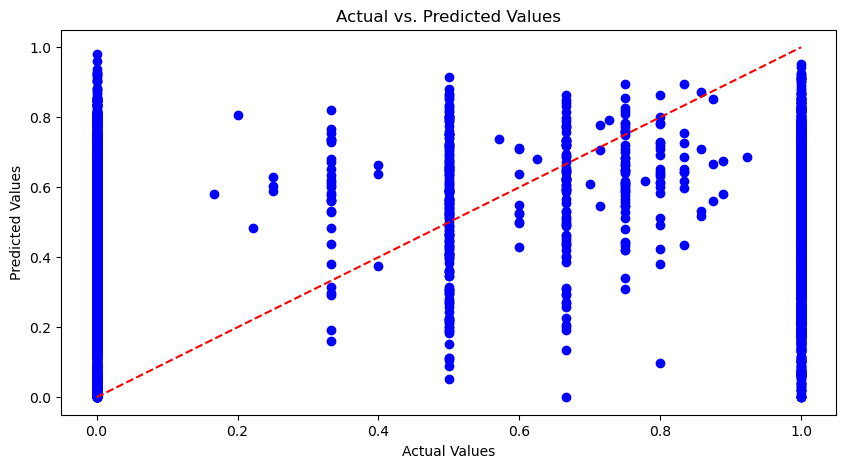

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_rf, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

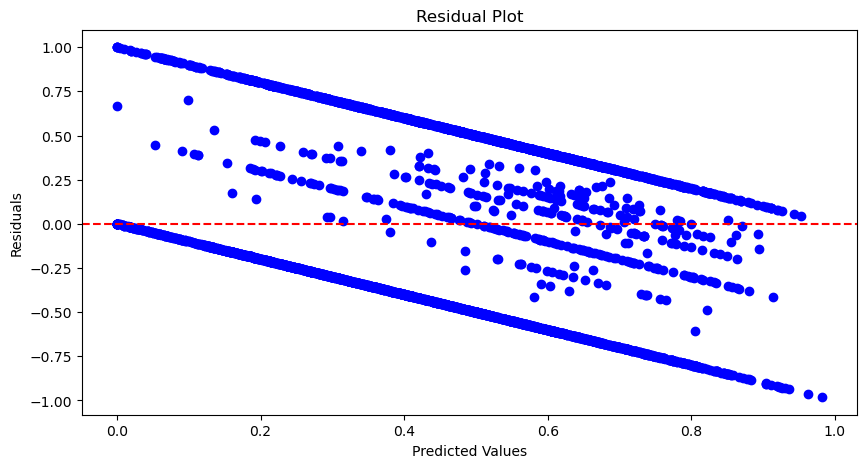

In [ ]:
residuals_rf = np.array(y_test_copy) - np.array(y_predict_rf)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_rf, residuals_rf, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

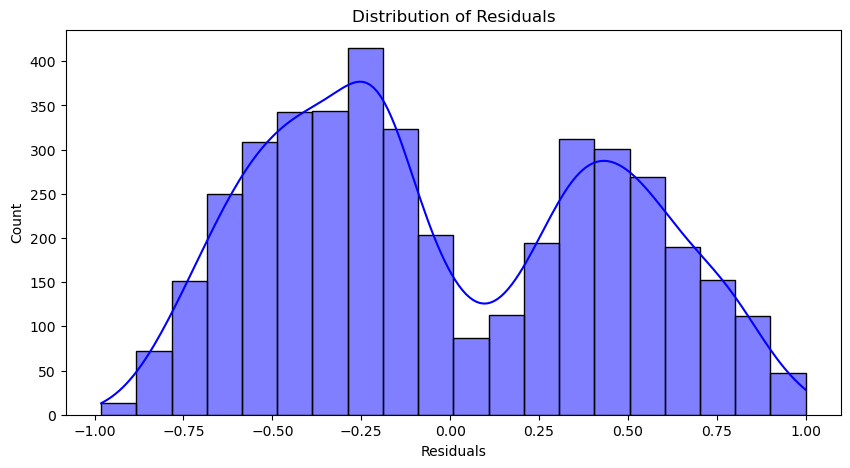

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals_rf, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [ ]:
xgb_r = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 123) 
xgb_r.fit(X_train_copy, y_train_copy) 
y_predict_xgb = xgb_r.predict(X_test_copy) 

filename_xgb = 'finalized_model_XGB1.model'
pickle.dump(xgb_r, open(filename_xgb, 'wb'))

loaded_xgb_model = pickle.load(open(filename_xgb, 'rb'))
result_xgb = loaded_xgb_model.score(X_test_copy, y_test_copy)
print("XGB Score:", result_xgb)

XGB Score: 0.08171462862470102


In [ ]:
#Mean Squared Error
mse_xgb = mean_squared_error(y_test_copy, y_predict_xgb)
print("Mean Squared Error:", mse_xgb)

#Mean Absolute Error
mae_xgb = mean_absolute_error(y_test_copy, y_predict_xgb)
print(f'Mean Absolute Error (MAE): {mae_xgb}')

#Root Mean Squared Error                                                                                                                                                                                             print(f'Mean Absolute Error (MAE): {mae}')
rmse_xgb = (mse_xgb ** 0.5)
print(f'Root Mean Squared Error (RMSE): {rmse_xgb}')

#R2 Function
r2_xgb = r2_score(y_test_copy, y_predict_xgb)
print(f"R-squared: {r2_xgb}")

Mean Squared Error: 0.20653080322500836
Mean Absolute Error (MAE): 0.41652344750007
Root Mean Squared Error (RMSE): 0.45445660213601075
R-squared: 0.08171462862470102


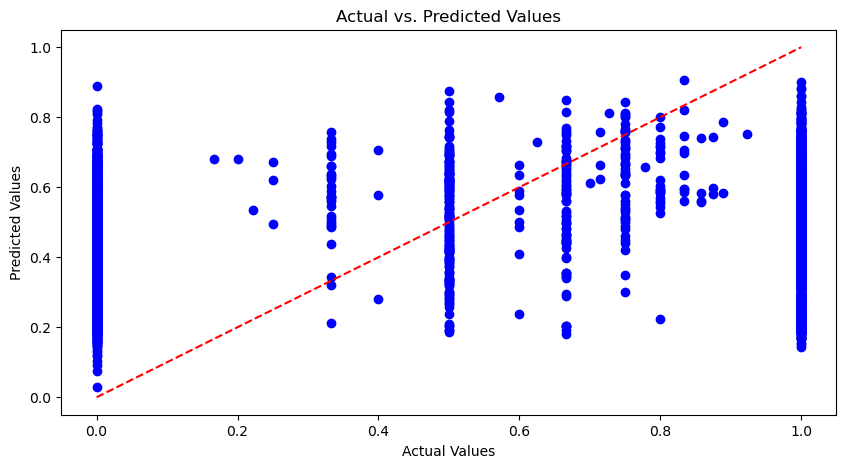

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(y_test_copy, y_predict_xgb, color='blue')
plt.plot([min(y_test_copy), max(y_test_copy)], [min(y_test_copy), max(y_test_copy)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()

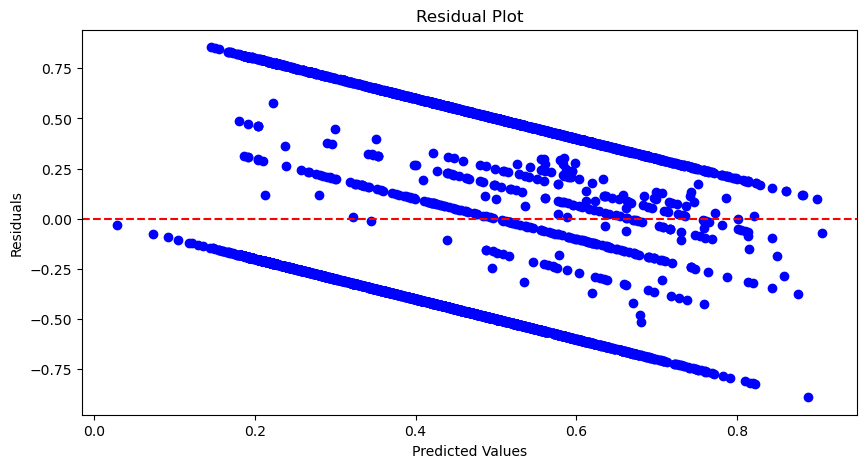

In [ ]:
residuals_xgb = np.array(y_test_copy) - np.array(y_predict_xgb)
plt.figure(figsize=(10, 5))
plt.scatter(y_predict_xgb, residuals_xgb, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

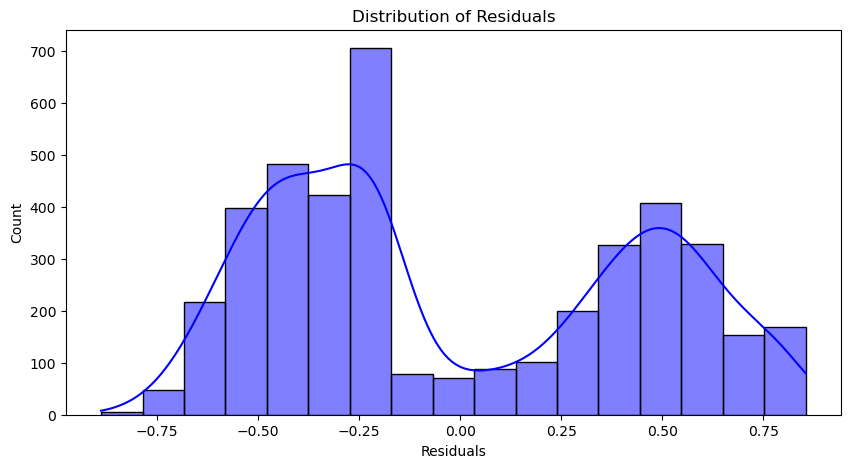

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(residuals_xgb, kde=True, color='blue')
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

In [17]:
hgbr = HistGradientBoostingRegressor(loss = 'squared_error', learning_rate=0.1, max_iter=100,
                                    max_bins=255, early_stopping='auto', n_iter_no_change=100).fit(X_train_copy, y_train_copy)
y_predict_hgbr = hgbr.predict(X_test_copy)
filename_hgbr = 'finalized_model_HGBR1.model'
pickle.dump(hgbr, open(filename_hgbr, 'wb'))

loaded_hgbr_model = pickle.load(open(filename_hgbr, 'rb'))
result_hgbr = loaded_hgbr_model.score(X_test_copy, y_test_copy)
print("Histogram-based Gradient Boosting Regression Tree Score:", result_hgbr)

score = hgbr.score(X_train_copy, y_train_copy)
print(score)

Histogram-based Gradient Boosting Regression Tree Score: 0.06411459290603594
0.2112012641890466


Five primary models were utilized to analyze the data and make predictions of our target feature, NegativeEmotions, utilizing our training set. These models included: KNN Regressor, Linear Regression, SVMs, Random Forest, and XGB. From our analysis (referenceable in the upper portion of the Jupyter Notebook), we determined that the model using the XGB algorithm has the best performance at approximately 8%. The evaluation metrics we used for our data included MSE, MAE, RMSE, and an R^2 score. The largest MSE figure was determined to be 0.25 for SVM, and the smallest MSE figure was approximately 0.21 with XGB. The largest MAE figure determined was 0.42 with KNN Regression, and the least MAE figure was SVM with 0.29. The model with the greatest RMSE figure was the SVM model with an RMSE score of approximately 0.50, and the model with the smallest RMSE score was Linear Regression with 0.47. Lastly, the greatest R^2 score originated from the Linear Regression model with a score 0.03, and the smallest R^2 score is from the SVM model -0.11.